In [1]:
#Salary prediction from stackoverflow 2023 survey result

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("survey_results_public.csv")

df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [2]:
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [3]:
    df=df[["Age","Country","EdLevel","YearsCodePro", "Employment","ConvertedCompYearly"]]
df=df.rename({"ConvertedCompYearly":"Salary"},axis=1)
df.head()

,Age,Country,EdLevel,YearsCodePro,Employment,Salary
0,18-24 years old,NaN,NaN,NaN,NaN,NaN
1,25-34 years old,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,45-54 years old,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,25-34 years old,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,25-34 years old,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0


In [4]:
df=df[df["Salary"].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48019 entries, 1 to 89171
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           48019 non-null  object 
 1   Country       48019 non-null  object 
 2   EdLevel       48019 non-null  object 
 3   YearsCodePro  47825 non-null  object 
 4   Employment    48007 non-null  object 
 5   Salary        48019 non-null  float64
dtypes: float64(1), object(5)
memory usage: 2.6+ MB


In [5]:
df=df.dropna()
df.isnull().sum()

Age             0
Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [6]:
#full time employers
df=df[df["Employment"]=="Employed, full-time"]
df=df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39155 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           39155 non-null  object 
 1   Country       39155 non-null  object 
 2   EdLevel       39155 non-null  object 
 3   YearsCodePro  39155 non-null  object 
 4   Salary        39155 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.8+ MB


In [7]:
df["Country"].value_counts()

United States of America                                10569
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
                                                        ...  
Botswana                                                    1
Sierra Leone                                                1
Guyana                                                      1
Guinea-Bissau                                               1
Antigua and Barbuda                                         1
Name: Country, Length: 165, dtype: int64

In [8]:
def clean_data(column,cutoff):
    map = {}
    for i in range(len(column)):
        if column.values[i]>=cutoff:
            map[column.index[i]] = column.index[i]
        else:
            map[column.index[i]] = 'Other'
    return map

In [9]:
country_map = clean_data(df.Country.value_counts(),300)
df['Country'] = df.Country.map(country_map)
df['Country'].value_counts()

United States of America                                10569
Other                                                    6526
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
France                                                   1458
Netherlands                                              1002
Australia                                                 985
Brazil                                                    972
Spain                                                     966
Sweden                                                    882
Italy                                                     826
Poland                                                    740
Switzerland                                               511
Denmark                                                   440
Norway  

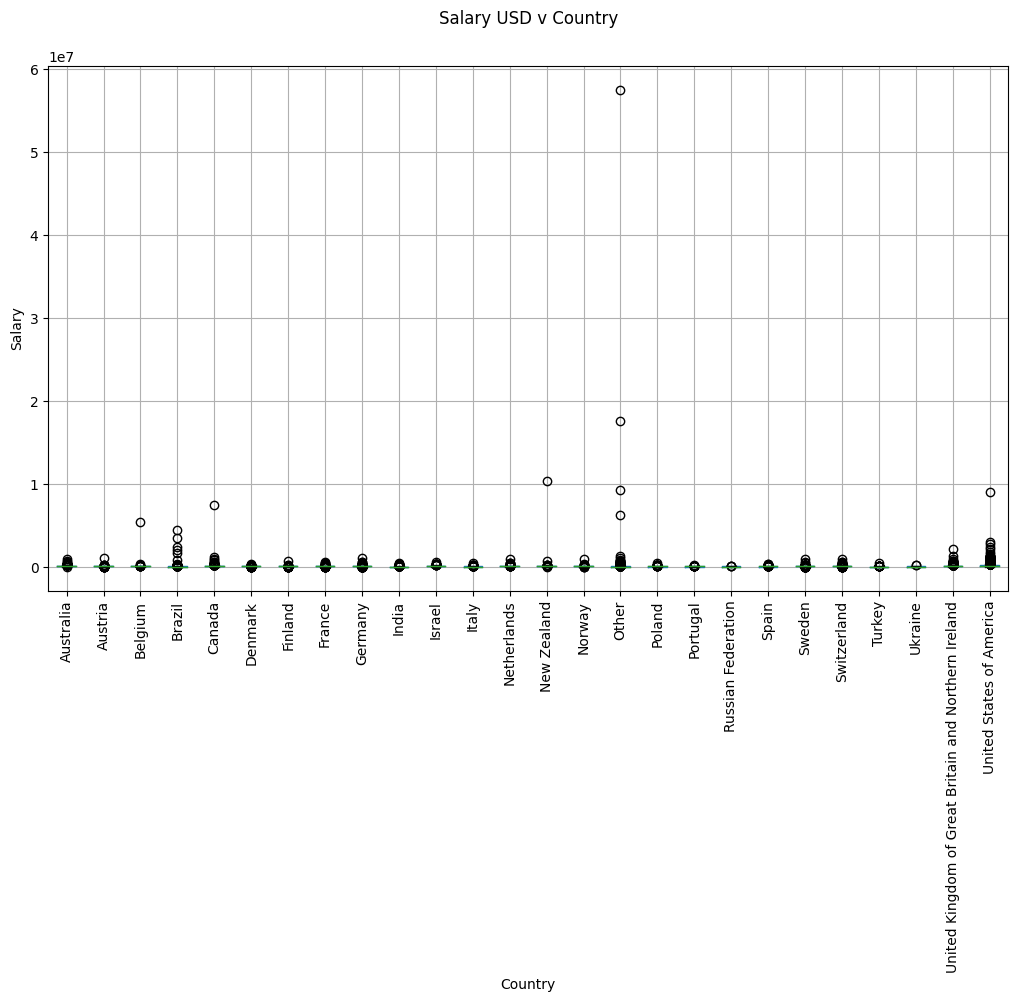

In [10]:
fig,ax = plt.subplots(1,1,figsize=(12,7))
df.boxplot("Salary","Country",ax=ax)
plt.suptitle("Salary USD v Country")
plt.title('')
plt.ylabel("Salary")
plt.xticks(rotation=90)

plt.show()

In [11]:
data = df.groupby('Country')['Salary'].describe().reset_index()[['Country','25%','75%']]
data.head()
df = df.merge(data, on = "Country",how ="left")
df.head()

,Age,Country,EdLevel,YearsCodePro,Salary,25%,75%
0,25-34 years old,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,285000.0,110000.0,200000.0
1,45-54 years old,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,250000.0,110000.0,200000.0
2,25-34 years old,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,156000.0,110000.0,200000.0
3,35-44 years old,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,96828.0,59586.0,111724.0
4,35-44 years old,United States of America,Some college/university study without earning ...,3,135000.0,110000.0,200000.0


In [12]:
#capping method
data = df.groupby('Country')['Salary'].describe().reset_index()[['Country','25%','75%']]
data.head(50)

,Country,25%,75%
0,Australia,72714.00,118987.00
1,Austria,55472.00,84118.75
2,Belgium,44978.00,74963.00
3,Brazil,17042.00,48690.00
4,Canada,66916.00,118962.00
5,Denmark,74193.00,115028.00
6,Finland,53545.00,79979.50
7,France,43907.00,71750.00
8,Germany,58899.00,91026.00
9,India,8724.00,35139.00


In [13]:
mask = df["Salary"]<df['25%']
df.loc[mask,"Salary"] = df["25%"]

mask = df["Salary"]>df['75%']
df.loc[mask,"Salary"] = df["75%"]
df=df[df['Country']!='Other']
df

,Age,Country,EdLevel,YearsCodePro,Salary,25%,75%
0,25-34 years old,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,200000.0,110000.0,200000.0
1,45-54 years old,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,200000.0,110000.0,200000.0
2,25-34 years old,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,156000.0,110000.0,200000.0
3,35-44 years old,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,96828.0,59586.0,111724.0
4,35-44 years old,United States of America,Some college/university study without earning ...,3,135000.0,110000.0,200000.0
...,...,...,...,...,...,...,...
39148,25-34 years old,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,118962.0,66916.0,118962.0
39149,25-34 years old,Sweden,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,52981.0,46439.0,69106.0
39151,35-44 years old,Brazil,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",24,48690.0,17042.0,48690.0
39152,18-24 years old,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,15752.0,8724.0,35139.0


fig1, ax1 = plt.subplots()
    ax1.pie(x=data, labels=data.index, shadow=True, startangle=90)
    ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

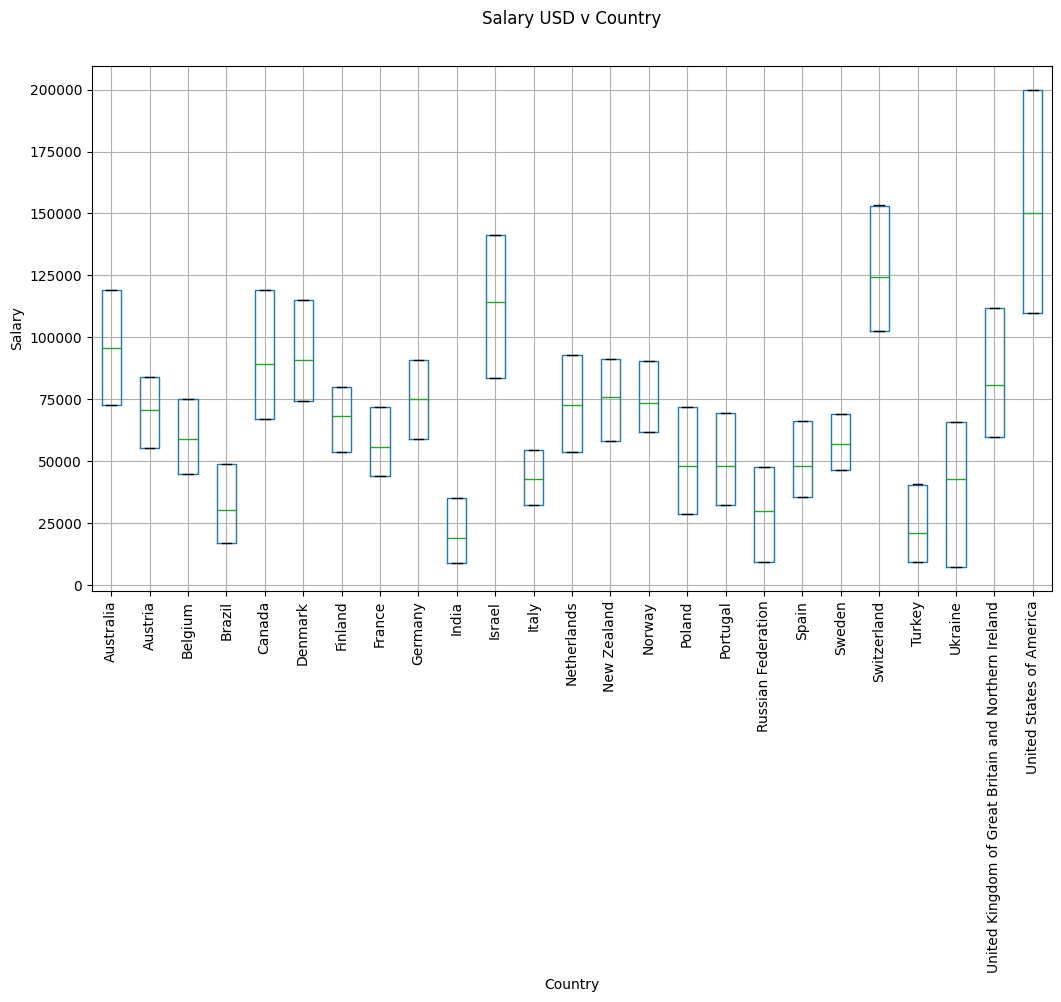

In [14]:
    fig,ax = plt.subplots(1,1,figsize=(12,7))
    df.boxplot("Salary","Country",ax=ax)
    plt.suptitle("Salary USD v Country")
    plt.title('')
    plt.ylabel("Salary")
    plt.xticks(rotation=90)

    plt.show()

In [15]:
df.drop(['25%','75%'],axis=1,inplace=True)
df.head()

,Age,Country,EdLevel,YearsCodePro,Salary
0,25-34 years old,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,200000.0
1,45-54 years old,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,200000.0
2,25-34 years old,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,156000.0
3,35-44 years old,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,96828.0
4,35-44 years old,United States of America,Some college/university study without earning ...,3,135000.0


In [16]:
df.Age.unique()

array(['25-34 years old', '45-54 years old', '35-44 years old',
       '55-64 years old', '18-24 years old', '65 years or older',
       'Prefer not to say', 'Under 18 years old'], dtype=object)

In [17]:
def cleaned_age(x):
    if x == "45-54 years old":
        return 45
    if x == '25-34 years old':
        return 25
    if x == '35-44 years old':
        return 35
    if x == '55-64 years old':
        return 55
    if x == '18-24 years old':
        return 18
    if x == '65 years or older':
        return 65
    if x == 'Prefer not to say':
        return 0
    if x == 'Under 18 years old':
        return 17

df["Age"] = df["Age"].apply(cleaned_age)

df["Age"].value_counts()

25    15043
35     9553
45     3332
18     3227
55     1264
65      178
0        18
17       14
Name: Age, dtype: int64

In [18]:
df = df[df["Age"]!= 0]

df["Age"].value_counts()

25    15043
35     9553
45     3332
18     3227
55     1264
65      178
17       14
Name: Age, dtype: int64

In [19]:
df.YearsCodePro.unique()
df.EdLevel.unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [20]:
def cleaned_edu(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x:
        return 'Professional degree'
    return 'Less than a Bachelors'

df["EdLevel"] = df.EdLevel.apply(cleaned_edu)

df["EdLevel"].unique()

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_16376\4134196945.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["EdLevel"] = df.EdLevel.apply(cleaned_edu)


array(['Bachelor’s degree', 'Less than a Bachelors', 'Master’s degree',
       'Professional degree'], dtype=object)

In [21]:
def cleaned_exp(x):
    if x == "More than 50 years":
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df["YearsCodePro"] = df["YearsCodePro"].apply(cleaned_exp)

df["YearsCodePro"].unique()

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_16376\550924223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["YearsCodePro"] = df["YearsCodePro"].apply(cleaned_exp)


array([ 9. , 23. ,  7. , 21. ,  3. , 15. ,  0.5, 10. ,  2. ,  6. , 14. ,
        5. , 19. , 13. , 16. , 28. , 24. , 17. , 25. , 12. ,  4. , 20. ,
        8. , 18. , 30. , 27. , 43. ,  1. , 38. , 33. , 29. , 22. , 11. ,
       34. , 42. , 26. , 31. , 36. , 39. , 40. , 32. , 44. , 37. , 35. ,
       48. , 50. , 45. , 41. , 46. , 49. , 47. ])

In [22]:
#Label Encoder
le_education = LabelEncoder()
df["EdLevel"] = le_education.fit_transform(df["EdLevel"])


le_country = LabelEncoder()
df["Country"] = le_country.fit_transform(df["Country"])

df.head()


C:\Users\Sandeep\AppData\Local\Temp\ipykernel_16376\135025047.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["EdLevel"] = le_education.fit_transform(df["EdLevel"])
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_16376\135025047.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Country"] = le_country.fit_transform(df["Country"])


,Age,Country,EdLevel,YearsCodePro,Salary
0,25,24,0,9.0,200000.0
1,45,24,0,23.0,200000.0
2,25,24,0,7.0,156000.0
3,35,23,1,21.0,96828.0
4,35,24,1,3.0,135000.0


**Developing Model**

In [23]:
#splitting the feature and target columns
X = df.iloc[:,:-1]
y = df["Salary"]

Scaling and creating Train Test

**Linear Regression Model**

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

lm = LinearRegression()
lm.fit(X_train,y_train)

y_pred = lm.predict(X_test)

print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score:",r2_score(y_test,y_pred))

Mean Absolute Error: 32488.842585742026
Root Mean Squared Error: 40582.97892128279
R2 Score: 0.3604401765042986


Decision Tress Regressor

In [25]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score:",r2_score(y_test,y_pred))

Mean Absolute Error: 16953.46289849454
Root Mean Squared Error: 22781.84444401033
R2 Score: 0.7984554339927882


Random Forest Regressor

In [26]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=1)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score:",r2_score(y_test,y_pred))

Mean Absolute Error: 16692.107940957623
Root Mean Squared Error: 22276.923790112596
R2 Score: 0.8072902148256964


**Hyperparameter Tuning**

In [27]:
from sklearn.model_selection import GridSearchCV
max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = RandomForestRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [28]:
regressor = gs.best_estimator_

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("R2 Score",r2_score(y_test,y_pred))
print("${:,.02f}".format(error))

R2 Score 0.8160887801717611
$21,762.43


In [29]:
max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

DTregressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(DTregressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [30]:
DTregressor = gs.best_estimator_

DTregressor.fit(X_train, y_train)
y_pred = DTregressor.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("R2 Score",r2_score(y_test,y_pred))
print("${:,.02f}".format(error))

R2 Score 0.8117457794350413
$22,017.89


In [31]:
df

,Age,Country,EdLevel,YearsCodePro,Salary
0,25,24,0,9.0,200000.0
1,45,24,0,23.0,200000.0
2,25,24,0,7.0,156000.0
3,35,23,1,21.0,96828.0
4,35,24,1,3.0,135000.0
...,...,...,...,...,...
39148,25,4,0,12.0,118962.0
39149,25,19,0,8.0,52981.0
39151,35,3,2,24.0,48690.0
39152,18,9,0,2.0,15752.0


Predict the model

In [32]:
#Country, Age,,EdLevel,YearsCodePro
x = np.array([[25,'United States of America','Bachelor’s degree',5]])
x

array([['25', 'United States of America', 'Bachelor’s degree', '5']],
      dtype='<U24')

In [33]:
x[:,1] = le_country.transform(x[:,1])
x[:,2] = le_education.transform(x[:,2])
x = x.astype(float)

x

array([[25., 24.,  0.,  5.]])

In [34]:
y_pred = DTregressor.predict(x)
y_pred

C:\Users\Sandeep\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([142358.1511254])

In [35]:
import pickle

In [36]:
data = {"model": DTregressor, "le_country": le_country, "le_education": le_education}
with open('salarypredict_model.pkl', 'wb') as file:
    pickle.dump(data, file)
    

In [37]:
with open('salarypredict_model.pkl', 'rb') as file:
    data=pickle.load(file)
loaded_regressor=data["model"]
le_country=data["le_country"]
le_education=data["le_education"]

In [38]:
y_pred= loaded_regressor.predict(x)
y_pred

C:\Users\Sandeep\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([142358.1511254])

In [39]:
df["Country"]

0        24
1        24
2        24
3        23
4        24
         ..
39148     4
39149    19
39151     3
39152     9
39153     7
Name: Country, Length: 32611, dtype: int32

TypeError: float() argument must be a string or a real number, not 'dict'

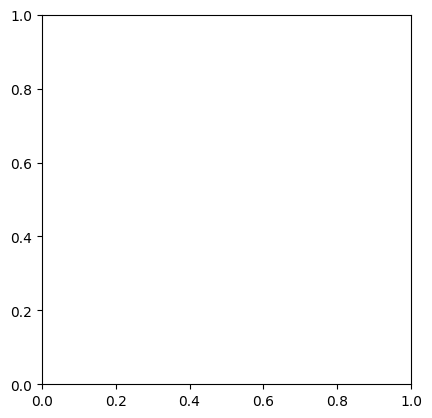

In [42]:
fig1, ax1 = plt.subplots()
ax1.pie(data, labels=data.index, autopct="%1.1f%%", shadow=True, startangle=90)
ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()